Néstor Enrique Forero Herrera 

Date: 2020-09-21

e-mail: neforeroh@unal.edu.co , ne.forero172@uniandes.edu.co

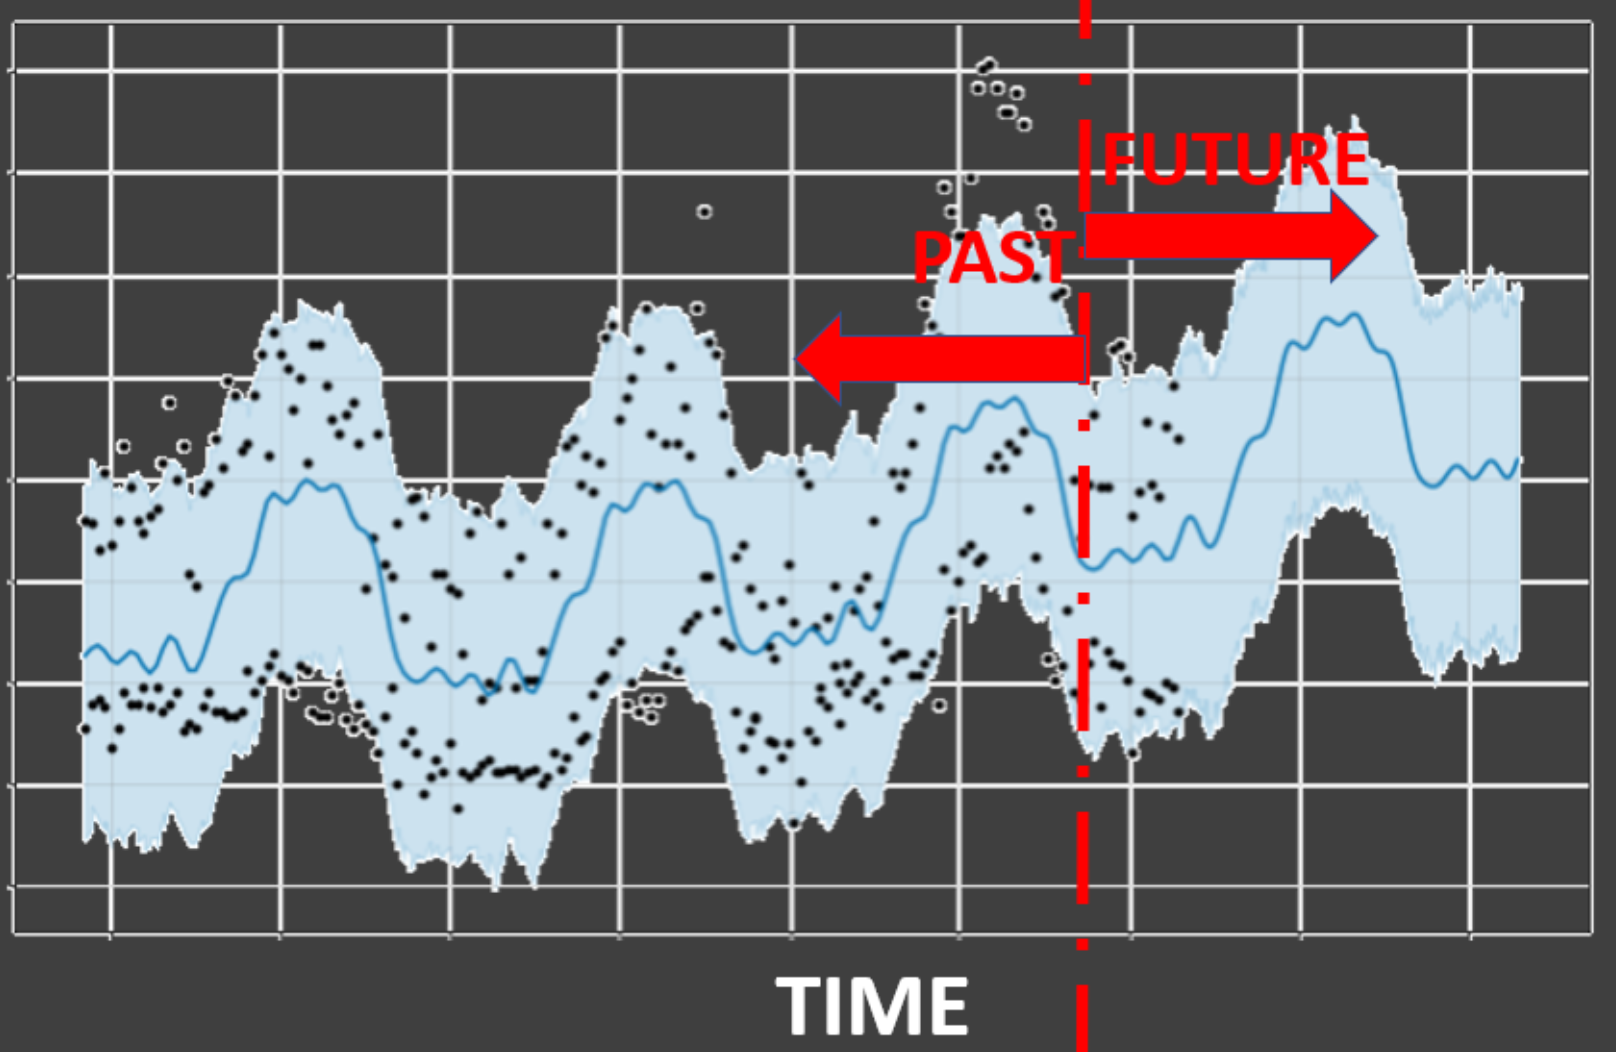

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Indicando la ruta de la carpeta donde están los archivos. 
%cd '/content/drive/My Drive/ProColombia/Capacitación equipo'

/content/drive/My Drive/ProColombia/Capacitación equipo


# Requirements

fbprophet

pandas

numpy

plotly

matplotlib

seaborn


In [ ]:
!pip install fbprophet

# Importando liberias necesarias

In [ ]:
# import libraries 
import pandas as pd # Import Pandas for data manipulation using dataframes
import numpy as np # Import Numpy for data statistical analysis 
import matplotlib.pyplot as plt # Import matplotlib for data visualisation
import random
import seaborn as sns
from fbprophet import Prophet

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Cargando las bases de datos

In [ ]:
# Cargando los datos de exportaciones colombianas
df_mensuales = pd.read_excel('data/Exportaciones mensuales Colombia.xlsx')

In [ ]:
# Revisando la información cargada
df_mensuales.head()

,Cadena Productiva,Año,Mes,Fecha,Año y mes,Valor FOB en USD,Peso Neto Exportación Kg,Cantidad Exportada
0,Agroalimentos,2014,201401,2014/01/01,2014/01,4.891955e+08,3.663280e+08,8.693356e+08
1,Agroalimentos,2014,201402,2014/02/01,2014/02,5.907106e+08,3.911438e+08,9.285137e+08
2,Agroalimentos,2014,201403,2014/03/01,2014/03,5.481413e+08,3.625225e+08,8.195710e+08
3,Agroalimentos,2014,201404,2014/04/01,2014/04,6.329991e+08,3.647163e+08,8.655161e+08
4,Agroalimentos,2014,201405,2014/05/01,2014/05,7.272736e+08,4.918293e+08,1.186859e+09


In [ ]:
# Mirando las categorias de las Cadenas
df_mensuales['Cadena Productiva'].unique()

array(['Agroalimentos', 'Industrias 4.0',
       'Metalmecánica y Otras Industrias', 'Mineras', 'Otros',
       'Químicos y Ciencias de la Vida', 'Sistema Moda'], dtype=object)

In [ ]:
# Estadísticas descriptivas
df_mensuales[ (df_mensuales['Cadena Productiva']=='Sistema Moda') & (df_mensuales['Año']== 2019) ].describe()

,Año,Mes,Valor FOB en USD,Peso Neto Exportación Kg,Cantidad Exportada
count,12.0,12.000000,1.200000e+01,1.200000e+01,1.200000e+01
mean,2019.0,201906.500000,7.602858e+07,7.367260e+06,2.349225e+07
std,0.0,3.605551,5.764582e+06,8.744784e+05,2.516009e+06
min,2019.0,201901.000000,6.661531e+07,5.992995e+06,1.926769e+07
25%,2019.0,201903.750000,7.371764e+07,6.950259e+06,2.188977e+07
50%,2019.0,201906.500000,7.544611e+07,7.464500e+06,2.393101e+07
75%,2019.0,201909.250000,7.944834e+07,7.849076e+06,2.461426e+07
max,2019.0,201912.000000,8.564002e+07,8.662387e+06,2.770594e+07


In [ ]:
df_mensuales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 532 entries, 0 to 531
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Cadena Productiva         532 non-null    object 
 1   Año                       532 non-null    int64  
 2   Mes                       532 non-null    int64  
 3   Fecha                     532 non-null    object 
 4   Año y mes                 532 non-null    object 
 5   Valor FOB en USD          532 non-null    float64
 6   Peso Neto Exportación Kg  532 non-null    float64
 7   Cantidad Exportada        532 non-null    float64
dtypes: float64(3), int64(2), object(3)
memory usage: 33.4+ KB


In [ ]:
df_mensuales.isnull().sum()

Cadena Productiva           0
Año                         0
Mes                         0
Fecha                       0
Año y mes                   0
Valor FOB en USD            0
Peso Neto Exportación Kg    0
Cantidad Exportada          0
dtype: int64

# Explorando los datos

In [ ]:
df_mensuales = df_mensuales.sort_values("Fecha")

In [ ]:
# Filtrando datos a graficar
df = df_mensuales[ (df_mensuales['Cadena Productiva']=='Sistema Moda') ]

In [ ]:
df.columns

Index(['Cadena Productiva', 'Año', 'Mes', 'Fecha', 'Año y mes',
       'Valor FOB en USD', 'Peso Neto Exportación Kg', 'Cantidad Exportada'],
      dtype='object')

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


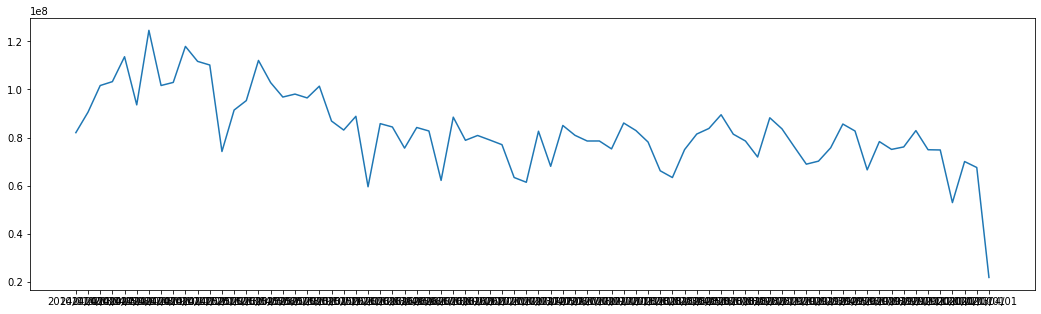

In [ ]:
plt.figure(figsize=(18,5))
plt.plot(df['Fecha'], df['Valor FOB en USD'])
#plt.xticks(rotation = 90)

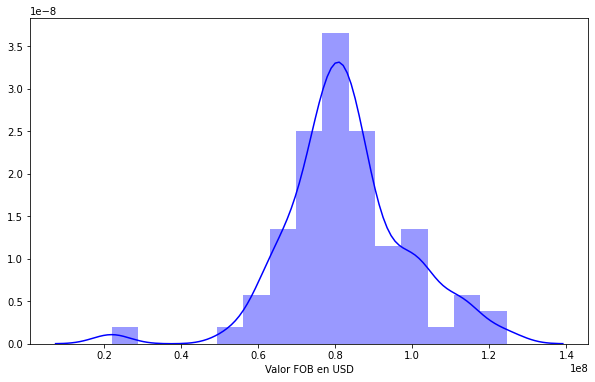

In [ ]:
# Distribución de las exportaciones
plt.figure(figsize=(10,6))
sns.distplot(df["Valor FOB en USD"], color = 'b')

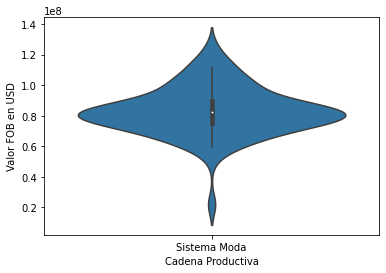

In [ ]:
sns.violinplot( y = "Valor FOB en USD", x="Cadena Productiva", data = df )

# Preparación de los datos para hacer pronósticos

In [ ]:
# Filtrando la información necesaria a predecir
df = df_mensuales[ (df_mensuales['Cadena Productiva']=='Sistema Moda') & ( df_mensuales['Año'] < 2020 ) ][['Año y mes','Valor FOB en USD']]

In [ ]:
# Cambiando los nombres a las columnas
df = df.rename(columns={'Año y mes':'ds', 'Valor FOB en USD':'y'})

In [ ]:
df['ds']= pd.to_datetime(df['ds'])

# Entendiendo la intuición de esta libreria

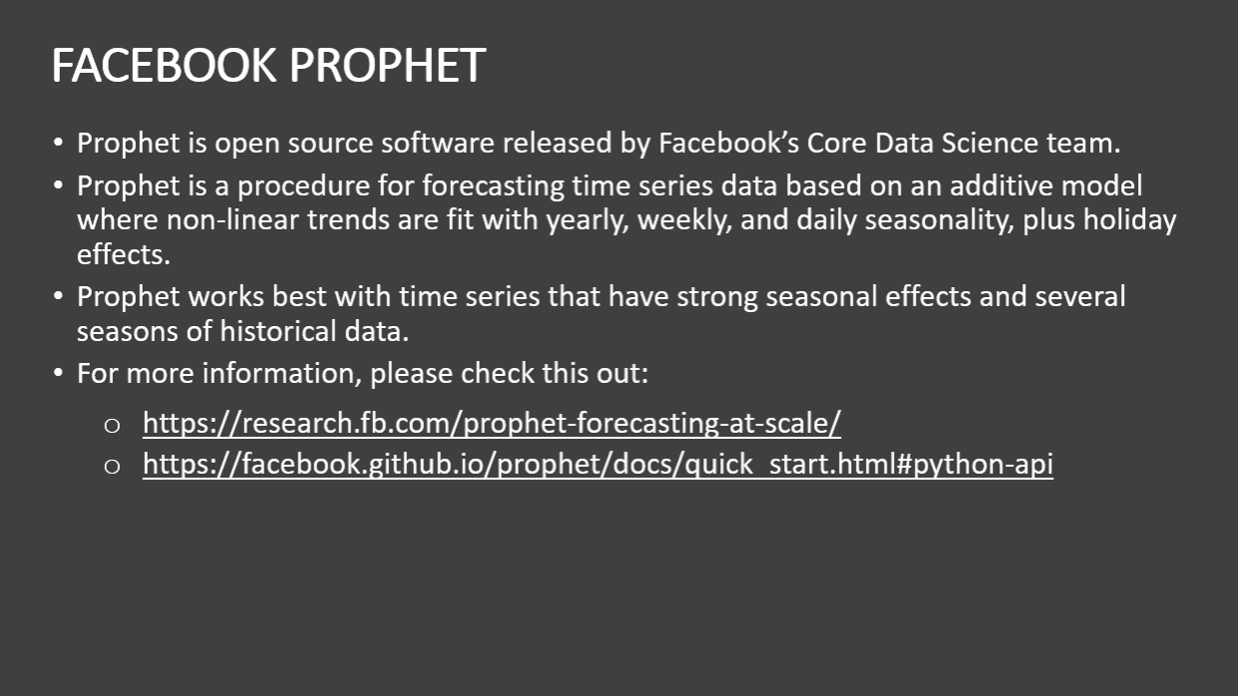

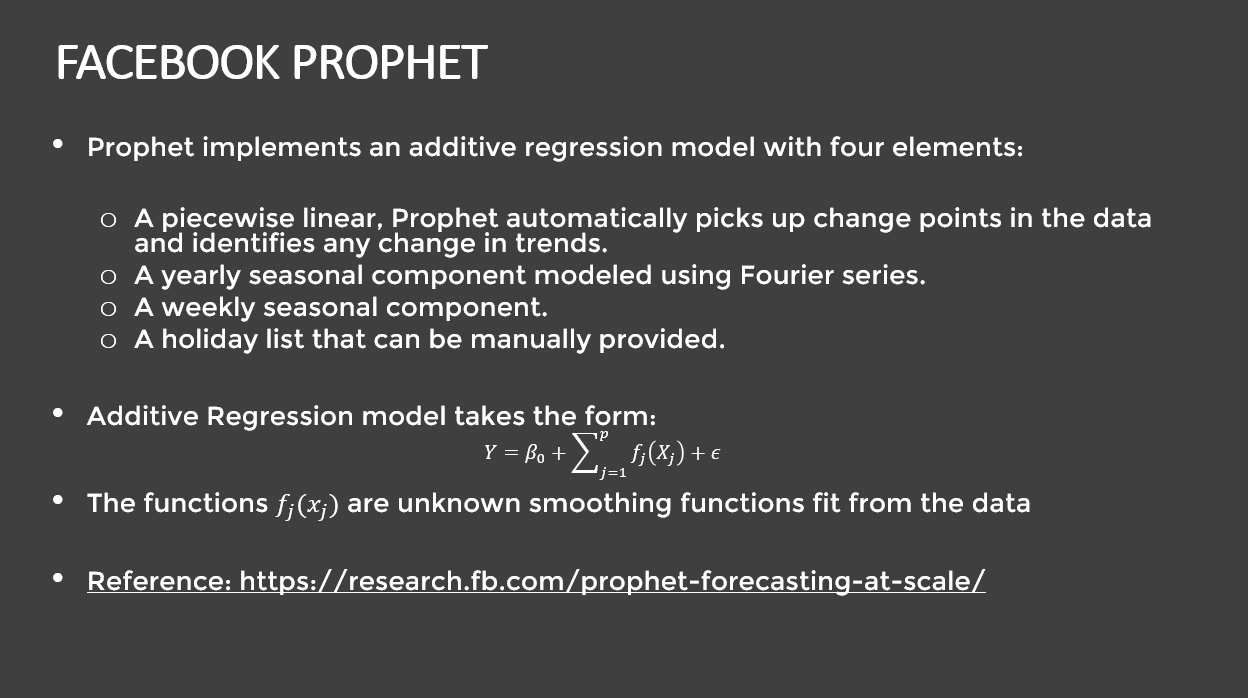

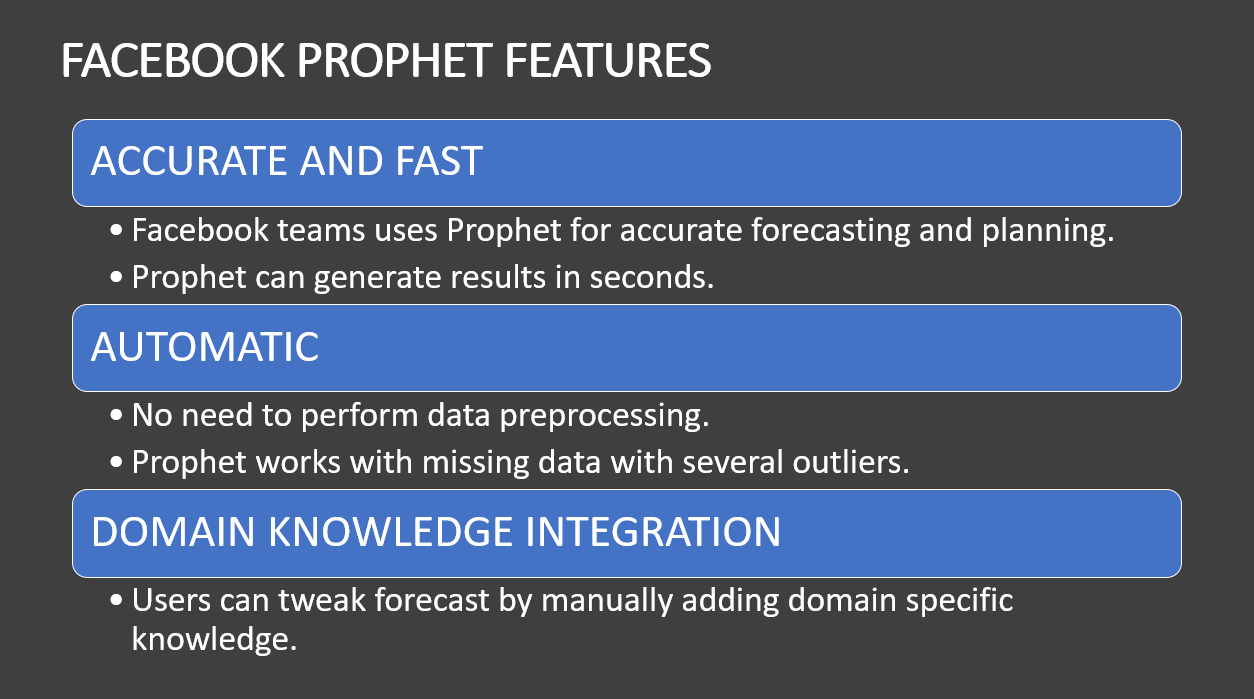

# Desarrollando el modelo de predicción - Sistema Moda

In [ ]:
m = Prophet()
m.fit( df )

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
# Haciendo predicciones
future = m.make_future_dataframe(periods=4, freq='m')
forecast = m.predict(future)

In [ ]:
df.shape

(72, 2)

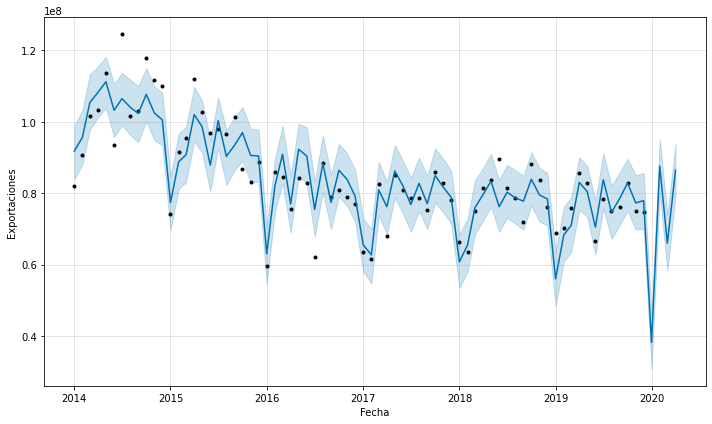

In [ ]:
figure = m.plot(forecast, xlabel='Fecha', ylabel='Exportaciones')

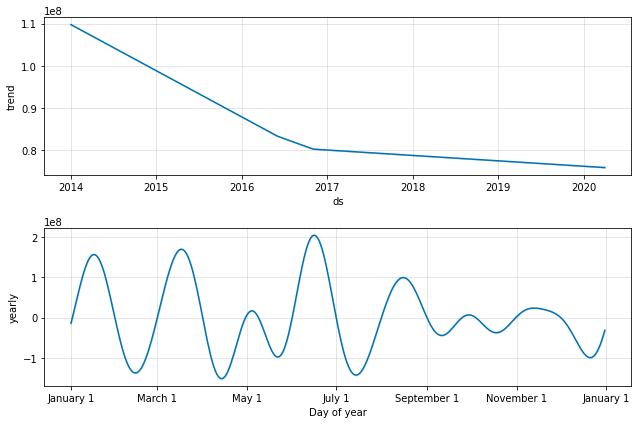

In [ ]:
figure3 = m.plot_components(forecast)

In [ ]:
# Dando formato a los valores a mostrar
forecast['yhat'] = forecast['yhat'].map('{:,.2f}'.format)
forecast['yhat_lower'] = forecast['yhat_lower'].map('{:,.2f}'.format)
forecast['yhat_upper'] = forecast['yhat_upper'].map('${:,.2f}'.format)

In [ ]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
71,2019-12-01,"77,932,342.51","70,029,668.48","$85,709,833.62"
72,2019-12-31,"38,250,052.18","30,771,415.45","$45,500,103.50"
73,2020-01-31,"87,634,441.80","80,073,611.87","$95,265,770.63"
74,2020-02-29,"66,009,623.26","58,262,321.71","$73,972,737.00"
75,2020-03-31,"86,465,993.28","79,221,677.83","$93,766,019.80"
